# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)

# Import Libraries

In [2]:

import os
import numpy as np
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)
%matplotlib inline

Using TensorFlow 2.2.0


# Rotation

In [3]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range = 40)

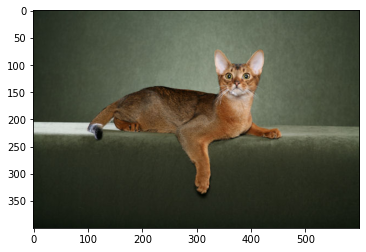

In [4]:
image_path = 'Image/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


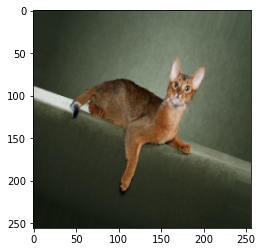

In [5]:
x, y = next(generator.flow_from_directory('Image', batch_size = 1))

plt.imshow(x[0].astype('uint8'));

# Width and Height Shifts

In [6]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = [-100, 50, 0, 50, 100],
                                                           height_shift_range = [-50, 0, 50])

Found 1 images belonging to 1 classes.


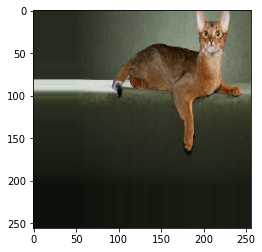

In [7]:
x, y = next(generator.flow_from_directory('Image/', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Brightness

Found 1 images belonging to 1 classes.


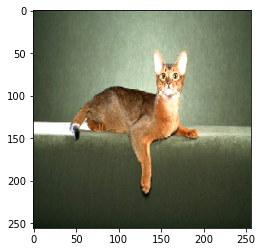

In [8]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range = (0.5, 2.))

x, y = next(generator.flow_from_directory('Image/', batch_size = 1))
plt.imshow(x[0].astype('uint8'));

# Shear Transformation

Found 1 images belonging to 1 classes.


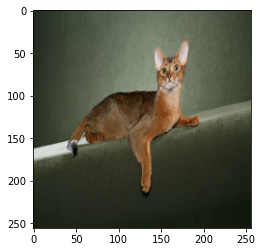

In [9]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(shear_range = 40)

x, y = next(generator.flow_from_directory('Image/', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Zoom

Found 1 images belonging to 1 classes.


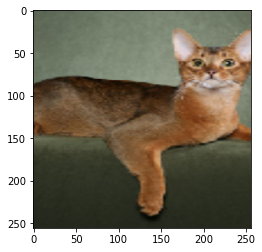

In [10]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range = 0.9)

x, y = next(generator.flow_from_directory('Image/', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Channel Shift

Found 1 images belonging to 1 classes.


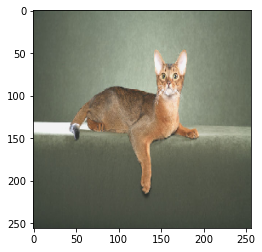

In [11]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(channel_shift_range = 100)

x, y = next(generator.flow_from_directory('Image/', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [12]:
x.mean()

111.72814

In [13]:
np.array(Image.open(image_path)).mean()

69.57810416666666

# Flips

Found 1 images belonging to 1 classes.


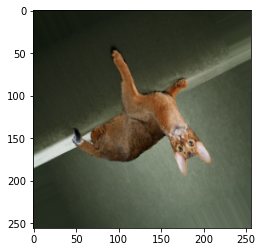

In [14]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip = True,
                                                           vertical_flip = True,
                                                           rotation_range = 30)

x, y = next(generator.flow_from_directory('Image/', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Normalization

### Featurewise

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(featurewise_center = True,
                                                           featurewise_std_normalization = True)

generator.fit(x_train)

In [16]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

-0.13935955 0.8792811 [[5]]
120.70756512369792


### Samplewise

In [17]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(samplewise_center = True,
                                                           samplewise_std_normalization = True)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

-1.1920929e-07 1.0 [[0]]


# Rescale and Preprocessing Function

In [18]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.,
                                                           preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input)

In [19]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [20]:
print(x.mean(), x.std(), y)

-0.080499366 0.32892525 [[4]]


# Using in Model Training

In [21]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
                                                           horizontal_flip = True,
                                                           rotation_range  = 20)

In [22]:
model = tf.keras.models.Sequential([tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = False,
                                                                                   input_shape = (224, 224, 3),
                                                                                   pooling = 'avg'),
                                   tf.keras.layers.Dense(10,
                                                         activation = 'softmax')])

model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam',
              metrics = ['accuracy'])

In [23]:
_ = model.fit(generator.flow(x_train,
                             y_train,
                             batch_size = 32),
             epochs = 1,
             steps_per_epoch = 10)

10/10 [==============================] - 2s 236ms/step - loss: 3.0953 - accuracy: 0.0469
